<a href="https://colab.research.google.com/github/steffiprog/ML/blob/main/1_visuals_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание

## ЗАДАНИЕ 1: Базовые графики matplotlib

/tmp/ipython-input-4161295877.py:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax.plot(x, y, 'b-', label='y = x^2 * sin(x)', color="green", linewidth=2)


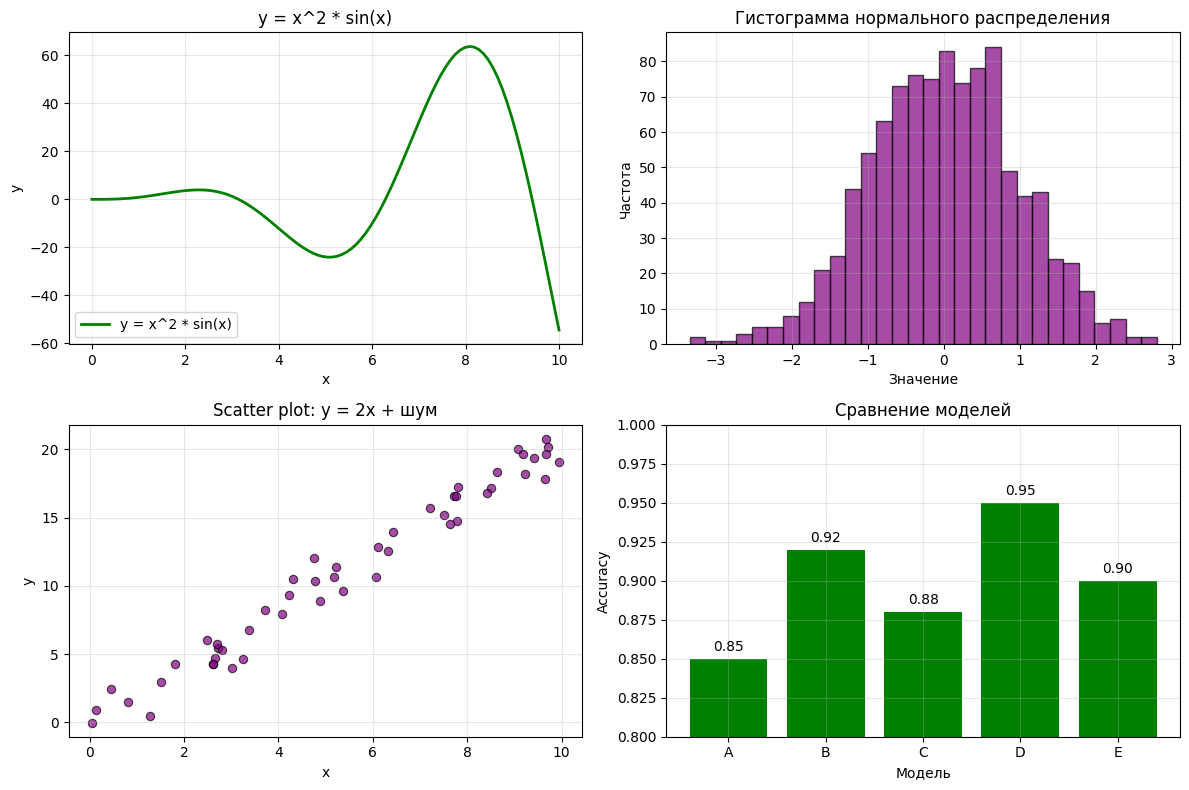

In [ ]:
# Создайте фигуру с 4 subplots (2x2):
# 1. Линейный график функции y = x^2 * sin(x) на интервале [0, 10]
#    Добавьте заголовок, подписи осей, сетку, легенду
# 2. Гистограмма 1000 случайных точек из нормального распределения
#    Настройте количество bins=30, добавьте заголовок
# 3. Scatter plot: 50 точек (x - равномерное распределение, y = 2x + шум)
#    Настройте размер точек, прозрачность, цвет
# 4. Bar chart: сравнение 5 разных моделей по точности
#    accuracy = [0.85, 0.92, 0.88, 0.95, 0.90]
#    Добавьте значения над столбцами

import numpy as np
import matplotlib.pyplot as plt

# Создаем фигуру с 4 subplots (2x2)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Линейный график y = x^2 * sin(x)
ax = axes[0, 0]
x = np.linspace(0, 10, 100)
y = x**2 * np.sin(x)
ax.plot(x, y, 'b-', label='y = x^2 * sin(x)', color="green", linewidth=2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('y = x^2 * sin(x)')
ax.legend(loc='lower left')
ax.grid(True, alpha=0.3)

# 2. Гистограмма нормального распределения
ax = axes[0, 1]
data = np.random.normal(0, 1, 1000)
ax.hist(data, bins=30, alpha=0.7, color='purple', edgecolor='black')
ax.set_xlabel('Значение')
ax.set_ylabel('Частота')
ax.set_title('Гистограмма нормального распределения', fontsize=12)
ax.grid(True, alpha=0.3)

# 3. Scatter plot: y = 2x + шум
ax = axes[1, 0]
x = np.random.uniform(0, 10, 50)
y = 2 * x + np.random.normal(0, 1, 50)
ax.scatter(x, y, alpha=0.7, color="purple", edgecolors='black', linewidth=0.8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Scatter plot: y = 2x + шум', fontsize=12)
ax.grid(True, alpha=0.3)

# 4. Bar chart: точность моделей
ax = axes[1, 1]
models = ['A', 'B', 'C', 'D', 'E']
accuracy = [0.85, 0.92, 0.88, 0.95, 0.90]
bars = ax.bar(models, accuracy, color="green")
ax.set_xlabel('Модель')
ax.set_ylabel('Accuracy')
ax.set_title('Сравнение моделей', fontsize=12)
ax.grid(True, alpha=0.3)
ax.set_ylim(0.8, 1)

# Добавляем значения над столбцами
for bar, acc in zip(bars, accuracy):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.005,
            f'{acc:.2f}', ha='center')

plt.tight_layout()
plt.show()

## ЗАДАНИЕ 2: Seaborn визуализации

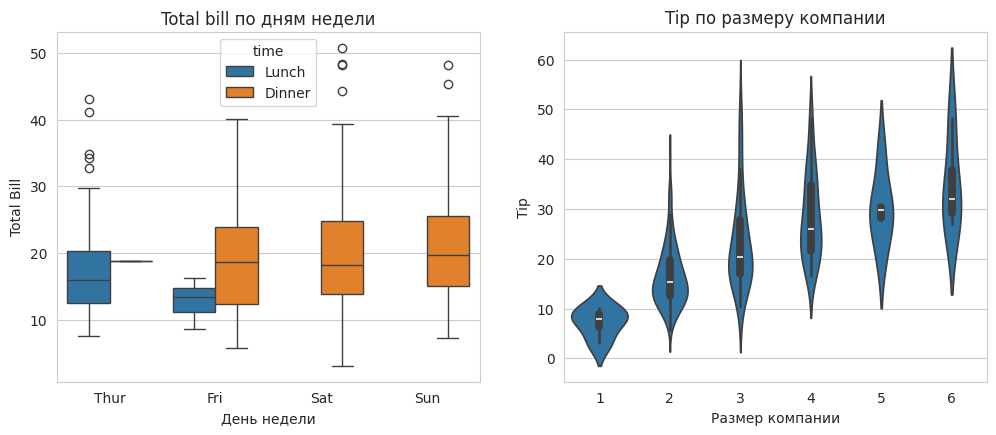

<Figure size 1200x1000 with 0 Axes>

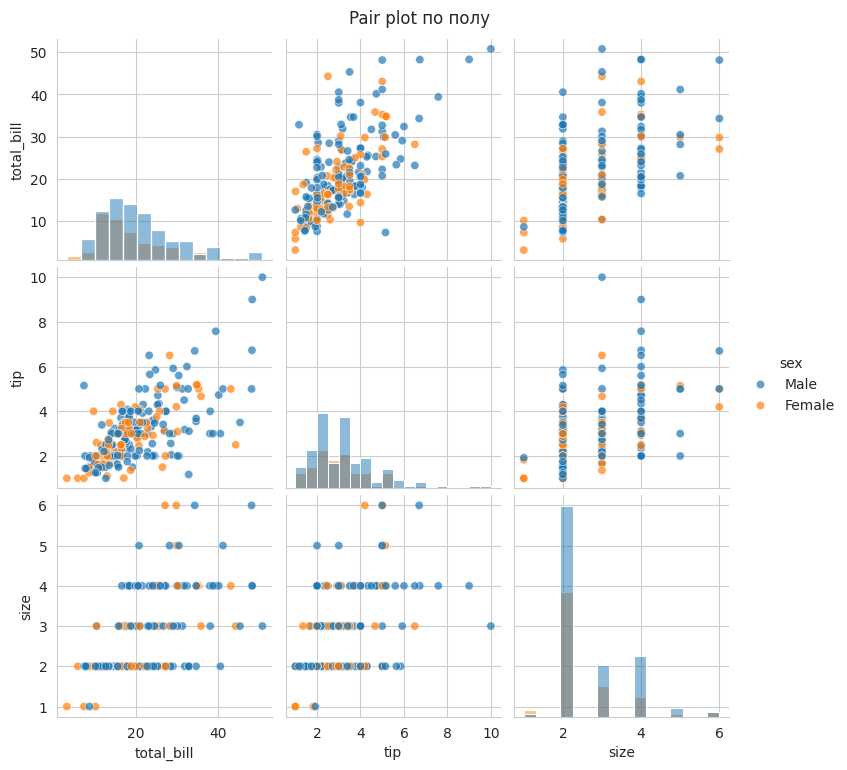

In [ ]:
# Создайте 3 графика:
# 1. Box plot: total_bill по дням недели (day)
#    Разделите дополнительно по времени (time) с помощью hue
# 2. Violin plot: tip в зависимости от размера компании (size)
# 3. Pair plot: выберите 4 числовых признака, раскрасьте по полу (sex)

import seaborn as sns
import matplotlib.pyplot as plt

# Загружаем датасет
tips = sns.load_dataset('tips')

# Создаем фигуру для графиков
sns.set_style("whitegrid")
plt.figure(figsize=(12,10))

# 1. Box plot: total_bill по дням с разделением по времени
# data=tips, x='day', y='total_bill', hue='time'
plt.subplot(2, 2, 1)
total_bill = ["Thur", "Fri", "Sat", "Sun"]
time = ["Dinner", "Lunch"]
sns.boxplot(data=tips, x='day', y='total_bill', hue='time')
plt.title('Total bill по дням недели')
plt.xlabel('День недели')
plt.ylabel('Total Bill')

# 2. Violin plot: tip по размеру компании
# x='size', y='tip'
plt.subplot(2, 2, 2)
sns.violinplot(data=tips, x='size', y='total_bill')
plt.title('Tip по размеру компании')
plt.xlabel('Размер компании')
plt.ylabel('Tip')

# 3. Pair plot: 4 числовых признака, раскраска по полу
# tips[['total_bill', 'tip', 'size', 'sex']]
# Создаем отдельную фигуру для pair plot
plt.figure(figsize=(12,10))
sns.pairplot(
    tips[['total_bill', 'tip', 'size', 'sex']],
    hue='sex',
    diag_kind='hist',
    plot_kws={'alpha': 0.7}
)
plt.suptitle('Pair plot по полу', y=1.02)
plt.show()

